In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
plt.style.use('seaborn-pastel')
import denn.utils

def make_animation(name, dirnames, names, skipstep=1):
    nplots = len(dirnames)
    fig, ax = plt.subplots(1,nplots,figsize=(int(5*nplots), 5))
    ax = ax.ravel()
    
    def load_traces(dirname):
        soln = np.load(os.path.join(dirname, "soln_pred.npy"))
        grid = np.load(os.path.join(dirname, "grid.npy"))
        pred = np.load(os.path.join(dirname, "pred_pred.npy"))
        
        print(pred.shape)
        
        # skipping for gif size
        soln = soln[:,::skipstep]
        grid = grid[:,::skipstep]
        pred = pred[:,::skipstep]
        
        return dict(soln=soln, grid=grid, pred=pred)
    
    traces = [load_traces(d) for d in dirnames]
    
    niters = traces[0]['pred'].shape[1]
    asoln = traces[0]['soln']
    agrid = traces[0]['grid']
    xmin, xmax = agrid.min(), agrid.max()
    pct_range_pad = 0.5
    range_mag = asoln.max()-asoln.min()
    ymin, ymax = asoln.min() - pct_range_pad*range_mag, asoln.max() + pct_range_pad*range_mag
    
    tr_lines = []
    for i in range(len(traces)):
        line1, = ax[i].plot([],[], lw=3, linestyle="solid", color='crimson', alpha=0.7, label="pred")
        line2, = ax[i].plot([],[], lw=3, linestyle="dashed", color='blue', alpha=0.7, label="true")
        
        ax[i].set_xlim((xmin, xmax))
        ax[i].set_ylim((ymin, ymax))
        
        ax[i].set_xlabel("$t$")
        ax[i].set_ylabel("$x$")
        
        ax[i].set_title(names[i])
        ax[i].legend(loc='upper right')
        tr_lines.append([line1, line2])
        
    fig.tight_layout()
        
    flat_lines = [l for ll in tr_lines for l in ll]

    def init():
        for trl in flat_lines:
            trl.set_data([], [])
        return flat_lines

    def animate(i):
        for j in range(len(dirnames)):
            x = traces[j]['grid'][:,0]
            yp = traces[j]['pred'][:,i]
            ys = traces[j]['soln'][:,i]

            flat_lines[j*2].set_data(x, yp)
            flat_lines[j*2 + 1].set_data(x, ys)
        return flat_lines

    anim = FuncAnimation(fig, animate, init_func=init,
                                   frames=niters, interval=1, blit=True)


    anim.save(f'{name}.gif') #, writer='imagemagick')

MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


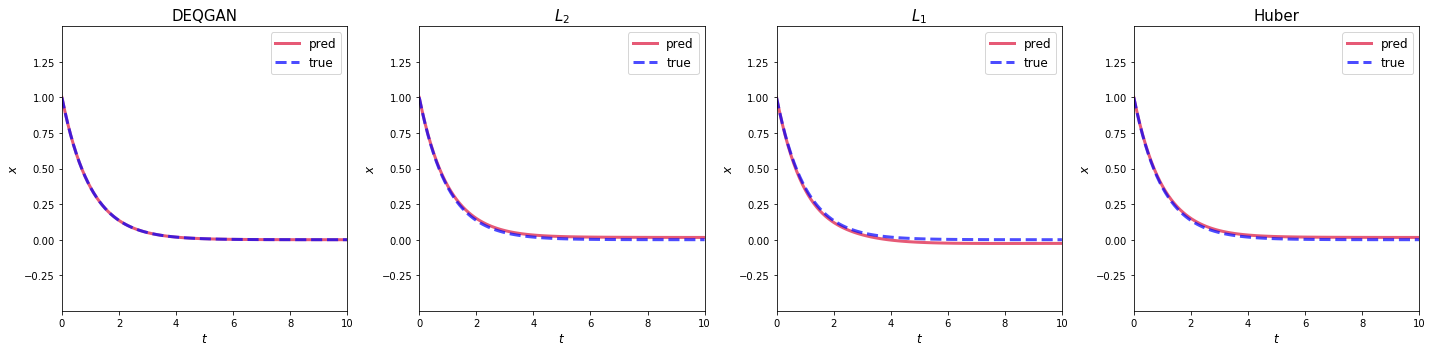

In [90]:
gan_dirname = "../../experiments/runs/EXP_run_gan_animation/animation/"
l2_dirname = "../../experiments/runs/EXP_run_L2_animation/animation/"
l1_dirname = "../../experiments/runs/EXP_run_L1_animation/animation/"
huber_dirname = "../../experiments/runs/EXP_run_Huber_animation/animation/"
make_animation('exp_noskip', [gan_dirname, l2_dirname, l1_dirname, huber_dirname], ['DEQGAN', "$L_2$", "$L_1$", "Huber"])

MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


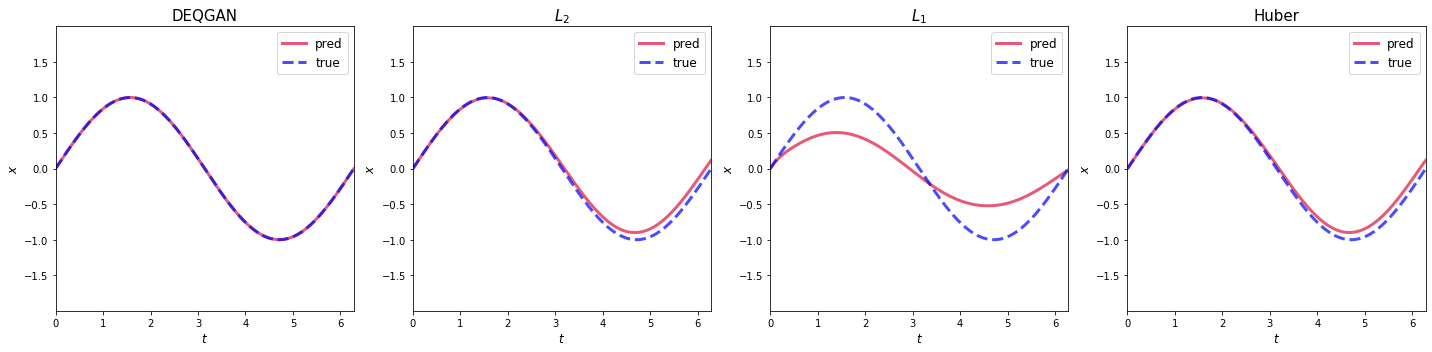

In [80]:
gan_dirname = "../../experiments/runs/SHO_run_gan_animation/animation/"
l2_dirname = "../../experiments/runs/SHO_run_L2_animation/animation/"
l1_dirname = "../../experiments/runs/SHO_run_L1_animation/animation/"
huber_dirname = "../../experiments/runs/SHO_run_Huber_animation/animation/"
make_animation('sho', [gan_dirname, l2_dirname, l1_dirname, huber_dirname], ['DEQGAN', "$L_2$", "$L_1$", "Huber"])

MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


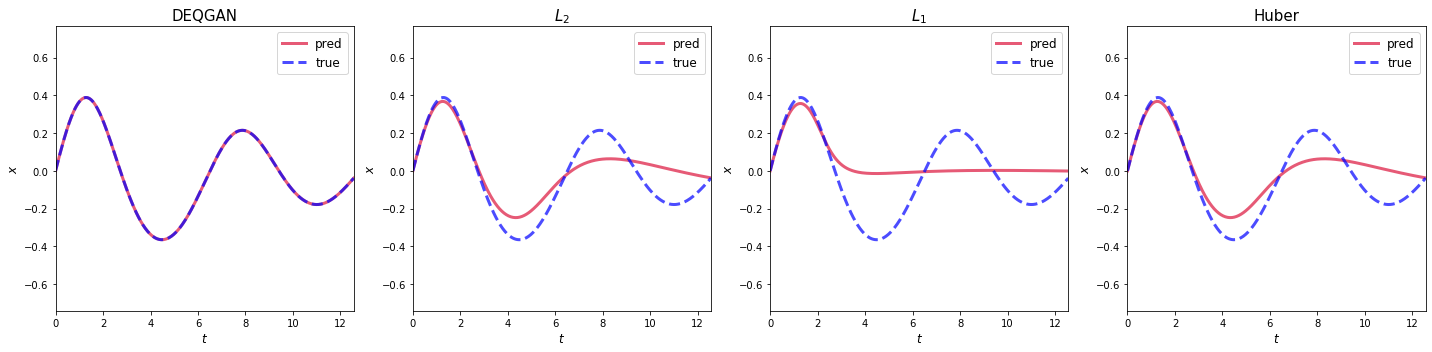

In [92]:
gan_dirname = "../../experiments/runs/NLO_run_gan_animation/animation/"
l2_dirname = "../../experiments/runs/NLO_run_L2_animation/animation/"
l1_dirname = "../../experiments/runs/NLO_run_L1_animation/animation/"
huber_dirname = "../../experiments/runs/NLO_run_Huber_animation/animation/"
make_animation('nlo', 
               [gan_dirname, l2_dirname, l1_dirname, huber_dirname], 
               ['DEQGAN', "$L_2$", "$L_1$", "Huber"],
              skipstep=5)

In [95]:
a = np.zeros((100,3))
b = np.ones((100,3))

In [98]:
np.dstack([a,b]).shape

(100, 3, 2)

## SIR is diff. has 3 preds / 3 solns

For now, just custom fix

In [123]:
import os
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
plt.style.use('seaborn-pastel')
import denn.utils

def make_animation(name, dirnames, names, skipstep=1):
    nplots = len(dirnames)
    fig, ax = plt.subplots(1,nplots,figsize=(int(5*nplots), 5))
    ax = ax.ravel()
    
    def load_traces(dirname):
        soln = np.load(os.path.join(dirname, "soln_pred.npy"))
        grid = np.load(os.path.join(dirname, "grid.npy"))
        pred = np.load(os.path.join(dirname, "pred_pred.npy"))
        
#         pred = pred.reshape(-1, 3, 5000)
#         soln = soln.reshape(-1, 3, 5000)

        print(soln.shape)
        
        
        # skipping for gif size
        soln = soln[:,:,::skipstep]
        grid = grid[:,::skipstep]
        pred = pred[:,:,::skipstep]
        
        return dict(soln=soln, grid=grid, pred=pred)
    
    traces = [load_traces(d) for d in dirnames]
    
    niters = traces[0]['pred'].shape[2]
    asoln = traces[0]['soln']
    agrid = traces[0]['grid']
    xmin, xmax = agrid.min(), agrid.max()
    pct_range_pad = 0.5
    range_mag = asoln.max()-asoln.min()
    ymin, ymax = asoln.min() - pct_range_pad*range_mag, asoln.max() + pct_range_pad*range_mag
    
    tr_lines = []
    for i in range(len(traces)):
        line1, = ax[i].plot([],[], lw=3, linestyle="solid", color='crimson', alpha=0.7, label="$\hat{S}$")
        line2, = ax[i].plot([],[], lw=3, linestyle="dashed", color='crimson', alpha=0.7, label="$S$")
        line3, = ax[i].plot([],[], lw=3, linestyle="solid", color='blue', alpha=0.7, label="$\hat{I}$")
        line4, = ax[i].plot([],[], lw=3, linestyle="dashdot", color='blue', alpha=0.7, label="$I$")
        line5, = ax[i].plot([],[], lw=3, linestyle="solid", color='limegreen', alpha=0.7, label="$\hat{R}$")
        line6, = ax[i].plot([],[], lw=3, linestyle="dotted", color='limegreen', alpha=0.7, label="$R$")
        
        
        ax[i].set_xlim((xmin, xmax))
        ax[i].set_ylim((ymin, ymax))
        
        ax[i].set_xlabel("$t$")
        ax[i].set_ylabel("$S,I,R$")
        
        ax[i].set_title(names[i])
        ax[i].legend(loc='upper right')
        
        tr_lines.append([line1, line2, line3, line4, line5, line6])
        
    fig.tight_layout()
        
    flat_lines = [l for ll in tr_lines for l in ll]

    def init():
        for trl in flat_lines:
            trl.set_data([], [])
        return flat_lines

    def animate(i):
        for j in range(len(dirnames)):
            x = traces[j]['grid'][:,0]
            yp0 = traces[j]['pred'][:,0,i]
            yp1 = traces[j]['pred'][:,1,i]
            yp2 = traces[j]['pred'][:,2,i]
            ys0 = traces[j]['soln'][:,0,i]
            ys1 = traces[j]['soln'][:,1,i]
            ys2 = traces[j]['soln'][:,2,i]

            flat_lines[j*6].set_data(x, yp0)
            flat_lines[j*6 + 1].set_data(x, ys0)
            flat_lines[j*6 + 2].set_data(x, yp1)
            flat_lines[j*6 + 3].set_data(x, ys1)
            flat_lines[j*6 + 4].set_data(x, yp2)
            flat_lines[j*6 + 5].set_data(x, ys2)
        return flat_lines

    anim = FuncAnimation(fig, animate, init_func=init,
                                   frames=niters, interval=1, blit=True)


    anim.save(f'{name}.gif') #, writer='imagemagick')

(200, 3, 5000)
(200, 3, 5000)
(200, 3, 5000)
(200, 3, 5000)


MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


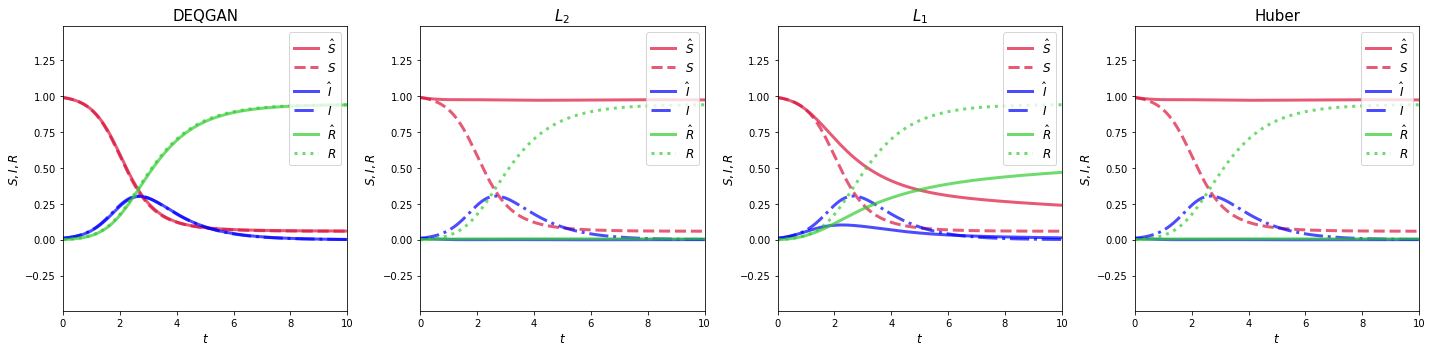

In [126]:
gan_dirname = "../../experiments/runs/SIR_run_gan_animation2/animation/"
l2_dirname = "../../experiments/runs/SIR_run_L2_animation2/animation/"
l1_dirname = "../../experiments/runs/SIR_run_L1_animation2/animation/"
huber_dirname = "../../experiments/runs/SIR_run_Huber_animation2/animation/"
make_animation('sir2', 
               [gan_dirname, l2_dirname, l1_dirname, huber_dirname], 
               ['DEQGAN', "$L_2$", "$L_1$", "Huber"],
               skipstep=10)

# COO has 2 


In [29]:
import os
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
plt.style.use('seaborn-pastel')
import denn.utils

def make_animation(name, dirnames, names, skipstep=1):
    nplots = len(dirnames)
    fig, ax = plt.subplots(1,nplots,figsize=(int(5*nplots), 5))
    try:
        ax = ax.ravel()
    except:
        ax = [ax]
    
    def load_traces(dirname):
        soln = np.load(os.path.join(dirname, "soln_pred.npy"))
        grid = np.load(os.path.join(dirname, "grid.npy"))
        pred = np.load(os.path.join(dirname, "pred_pred.npy"))
        
#         pred = pred.reshape(-1, 3, 5000)
#         soln = soln.reshape(-1, 3, 5000)

        print(soln.shape)
        
        
        # skipping for gif size
        soln = soln[:,::skipstep]
        grid = grid[:,::skipstep]
        pred = pred[:,::skipstep]
        
        return dict(soln=soln, grid=grid, pred=pred)
    
    traces = [load_traces(d) for d in dirnames]
    
    niters = traces[0]['pred'].shape[1]//2
    asoln = traces[0]['soln']
    agrid = traces[0]['grid']
    xmin, xmax = agrid.min(), agrid.max()
    pct_range_pad = 0.5
    range_mag = asoln.max()-asoln.min()
    ymin, ymax = asoln.min() - pct_range_pad*range_mag, asoln.max() + pct_range_pad*range_mag
    
    tr_lines = []
    for i in range(len(traces)):
        line1, = ax[i].plot([],[], lw=3, linestyle="solid", color='crimson', alpha=0.7, label="$\hat{x}$")
        line2, = ax[i].plot([],[], lw=3, linestyle="dashed", color='crimson', alpha=0.7, label="$x$")
        line3, = ax[i].plot([],[], lw=3, linestyle="solid", color='blue', alpha=0.7, label="$\hat{y}$")
        line4, = ax[i].plot([],[], lw=3, linestyle="dashdot", color='blue', alpha=0.7, label="$y$")
        
        
        ax[i].set_xlim((xmin, xmax))
        ax[i].set_ylim((ymin, ymax))
        
        ax[i].set_xlabel("$t$")
        ax[i].set_ylabel("$x,y$")
        
        ax[i].set_title(names[i])
        ax[i].legend(loc='upper right')
        
        tr_lines.append([line1, line2, line3, line4])
        
    fig.tight_layout()
        
    flat_lines = [l for ll in tr_lines for l in ll]

    def init():
        for trl in flat_lines:
            trl.set_data([], [])
        return flat_lines

    def animate(i):
        for j in range(len(dirnames)):
            t = traces[j]['grid'][:,0]
            
            xpred = traces[j]['pred'][:,2*i]
            ypred = traces[j]['pred'][:,2*i+1]
            
            xsol = traces[j]['soln'][:,2*i]
            ysol = traces[j]['soln'][:,2*i+1]

            flat_lines[j*4].set_data(t, xpred)
            flat_lines[j*4 + 1].set_data(t, xsol)
            flat_lines[j*4 + 2].set_data(t, ypred)
            flat_lines[j*4 + 3].set_data(t, ysol)
        return flat_lines

    anim = FuncAnimation(fig, animate, init_func=init,
                                   frames=niters, interval=1, blit=True)


    anim.save(f'{name}.gif') #, writer='imagemagick')

(100, 40000)
(100, 40000)
(100, 40000)
(100, 40000)


MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


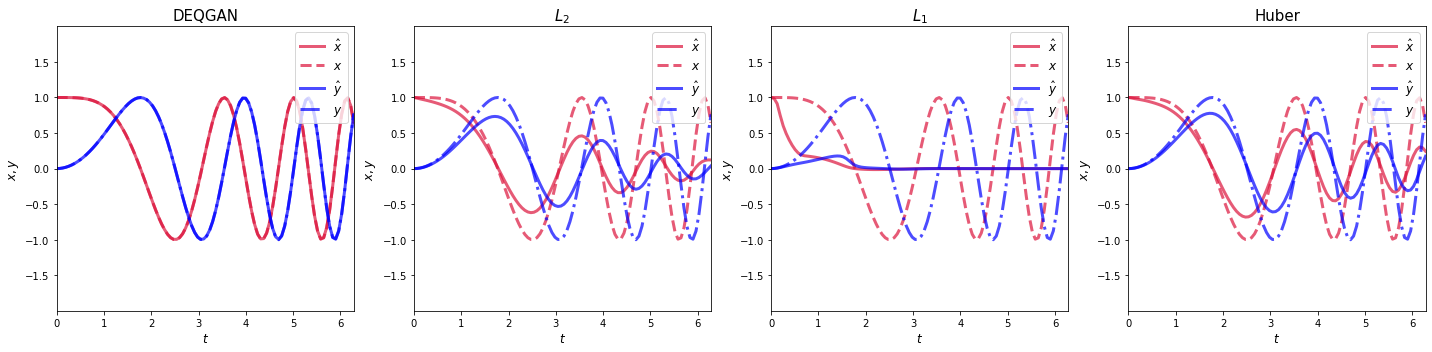

In [31]:
gan_dirname = "/Users/dylanrandle/Downloads/COO_run_besthypers_may162020/animation/"
l2_dirname = "/Users/dylanrandle/Downloads/COO_run_besthypers_may162020_MSE/animation/"
l1_dirname = "/Users/dylanrandle/Downloads/COO_run_besthypers_may162020_L1/animation/"
huber_dirname = "/Users/dylanrandle/Downloads/COO_run_besthypers_may162020_huber/animation/"
make_animation('coo', 
               [gan_dirname, l2_dirname, l1_dirname, huber_dirname], 
               ['DEQGAN', '$L_2$', '$L_1$', 'Huber'],
               skipstep=101)